In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./data/exams.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

In [5]:
df.drop_duplicates()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [7]:
cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [8]:
cat_cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [9]:
num_cols

['math score', 'reading score', 'writing score']

In [10]:
import matplotlib.pyplot as plt

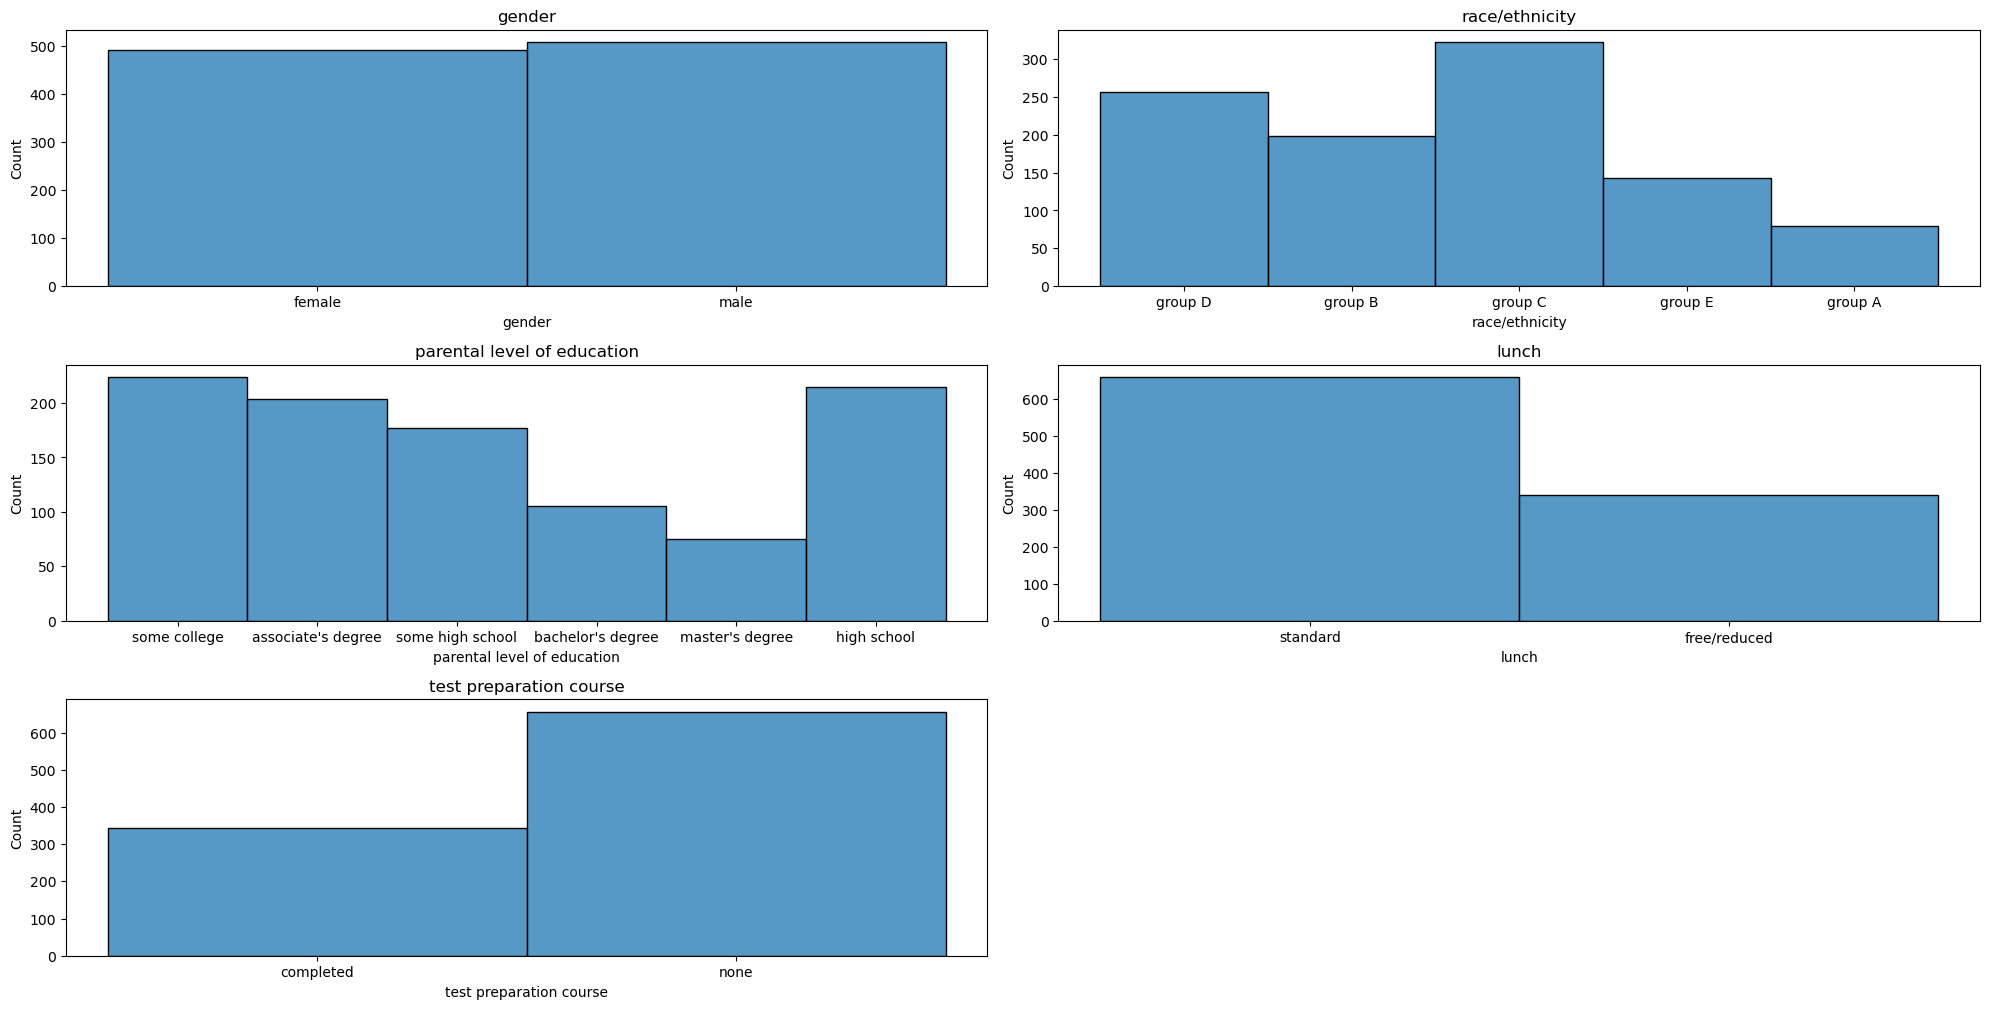

In [12]:
plt.figure(figsize=(20,10))
for index, i in enumerate(cat_cols):
    plt.subplot(3,2,index+1)
    plt.tight_layout()
    sns.histplot(df[i])
    plt.title(i)

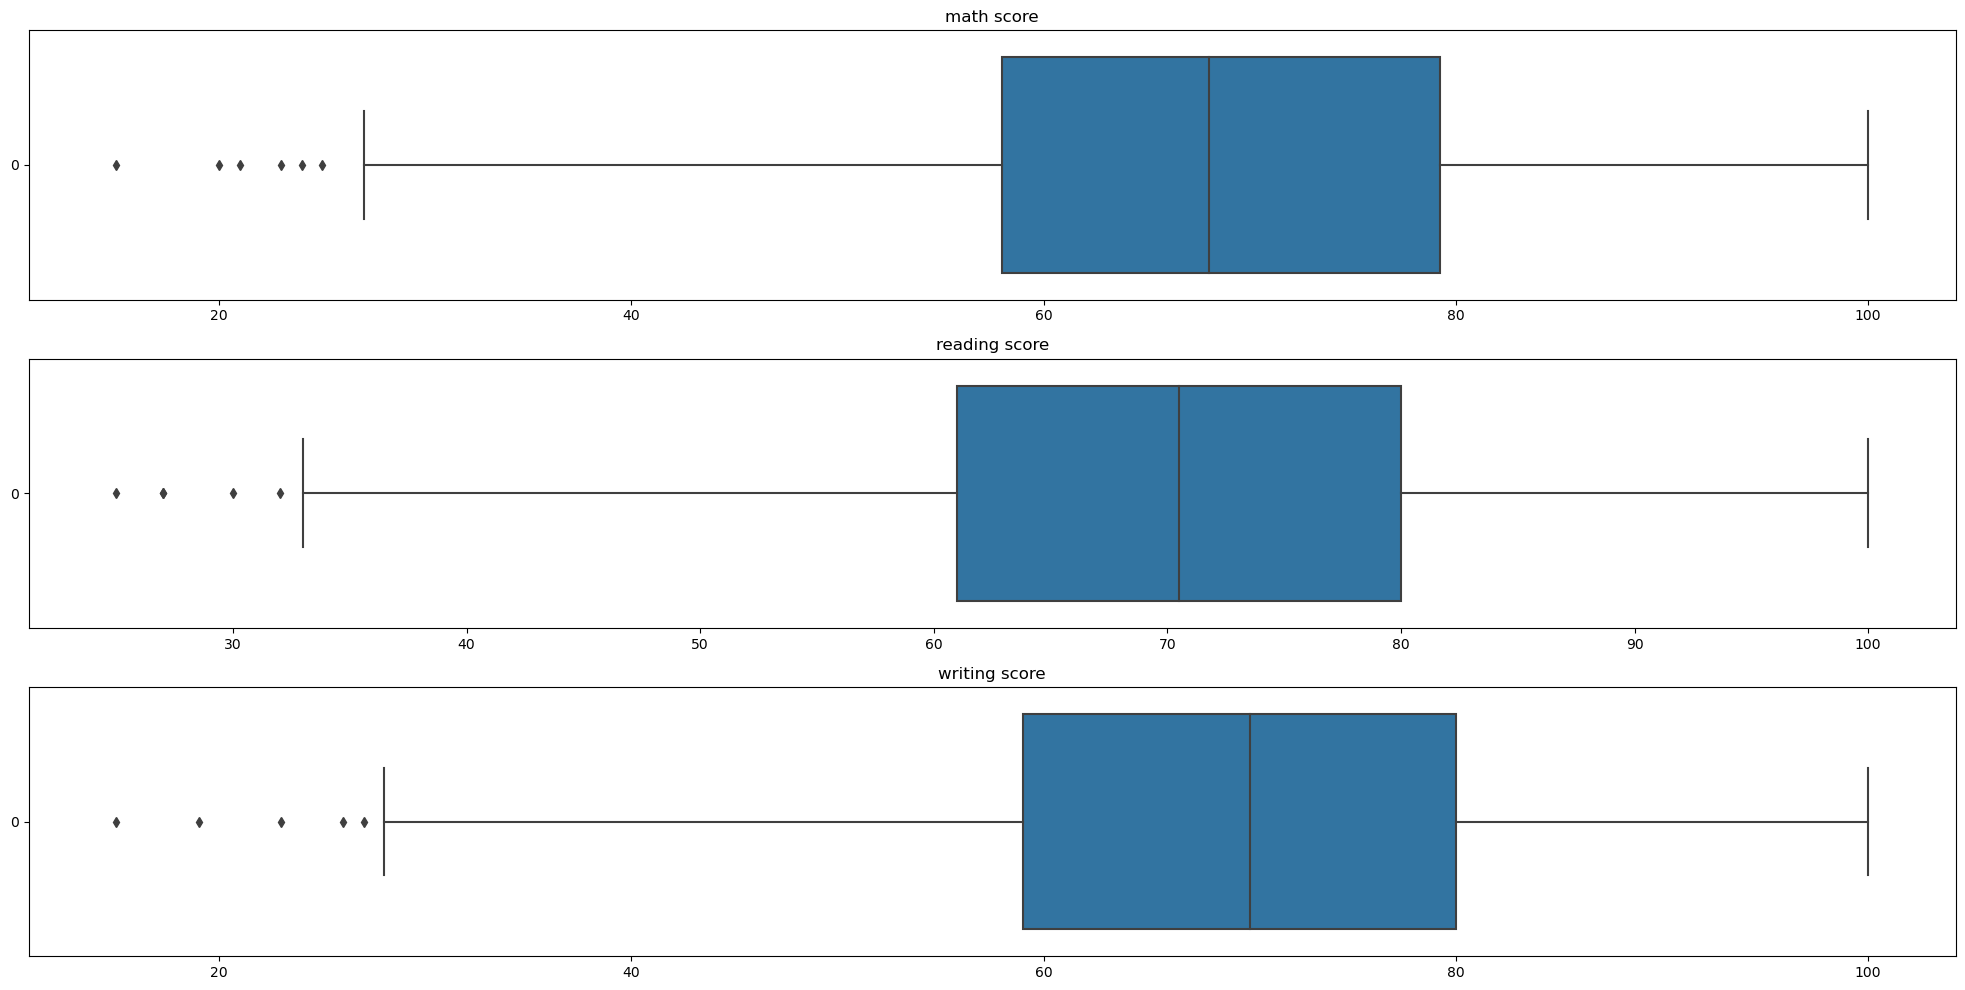

In [15]:
plt.figure(figsize=(20,10))
for index, i in enumerate(num_cols):
    plt.subplot(3,1,index+1)
    plt.tight_layout()
    sns.boxplot(df[i], orient='h')
    plt.title(i)

EDA

In [18]:
ethnicities_by_gender = df.groupby(['gender','race/ethnicity'])['race/ethnicity'].count()
ethnicities_by_gender

gender  race/ethnicity
female  group A            41
        group B           112
        group C           151
        group D           118
        group E            70
male    group A            38
        group B            86
        group C           172
        group D           139
        group E            73
Name: race/ethnicity, dtype: int64

<Figure size 2000x1000 with 0 Axes>

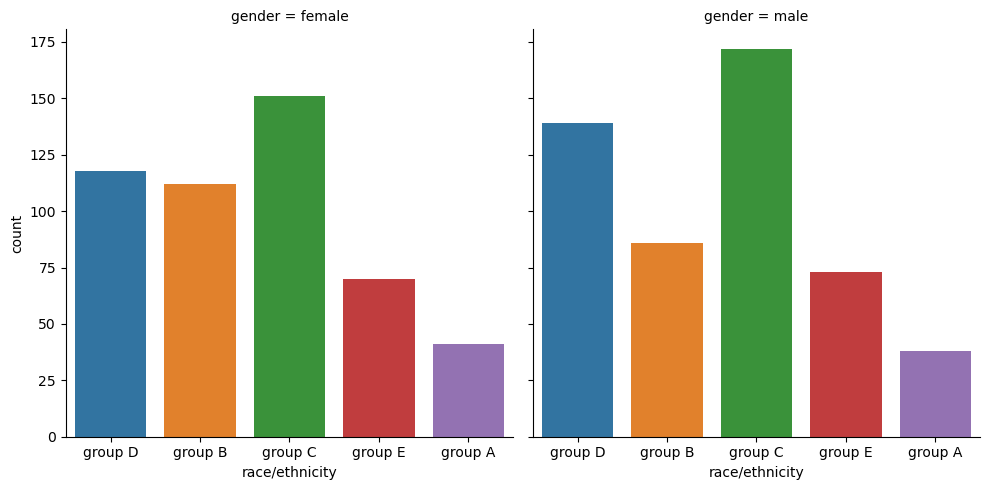

In [25]:
plt.figure(figsize=(20,10))
sns.catplot(data=df,
            x='race/ethnicity',
            kind='count', 
            col='gender')

In [19]:
parent_education_by_gender = df.groupby(['gender','parental level of education'])['parental level of education'].count()
parent_education_by_gender

gender  parental level of education
female  associate's degree             101
        bachelor's degree               52
        high school                    116
        master's degree                 33
        some college                   106
        some high school                84
male    associate's degree             103
        bachelor's degree               53
        high school                     99
        master's degree                 42
        some college                   118
        some high school                93
Name: parental level of education, dtype: int64

<Figure size 2000x1000 with 0 Axes>

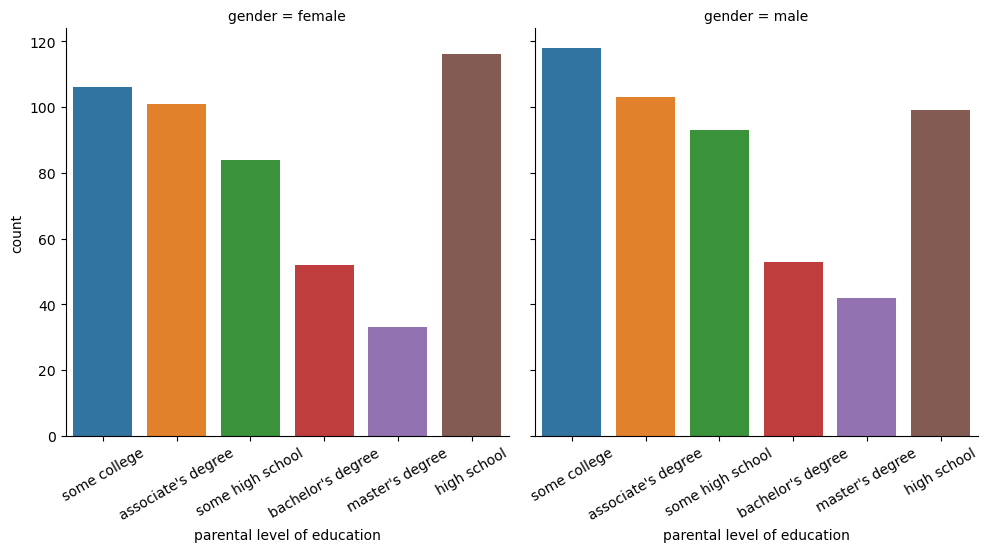

In [33]:
plt.figure(figsize=(20,10))
g = sns.catplot(data=df,
            x='parental level of education',
            kind='count',
            col='gender')
g.set_xticklabels(rotation=30)

In [34]:
lunch_type_by_gender = df.groupby(['gender','lunch'])['lunch'].count()
lunch_type_by_gender

gender  lunch       
female  free/reduced    171
        standard        321
male    free/reduced    169
        standard        339
Name: lunch, dtype: int64

<Figure size 2000x1000 with 0 Axes>

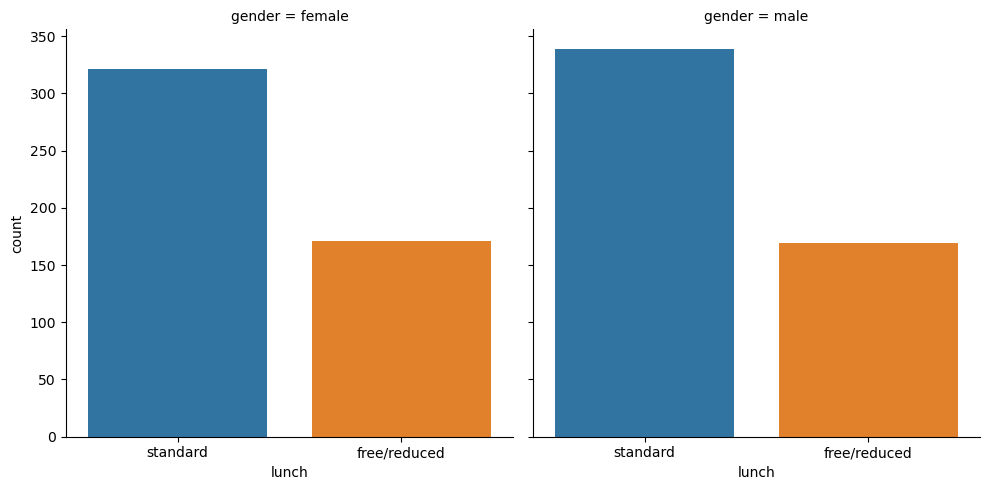

In [36]:
plt.figure(figsize=(20,10))
sns.catplot(data=df,
                x='lunch',
                kind='count',
                col='gender')


In [37]:
grades_by_gender = df.groupby('gender')['math score','reading score','writing score'].mean()
grades_by_gender

C:\Users\verdi\AppData\Local\Temp\ipykernel_24536\156445117.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grades_by_gender = df.groupby('gender')['math score','reading score','writing score'].mean()


,math score,reading score,writing score
gender,,,
female,64.77439,73.473577,73.439024
male,70.75000,67.387795,64.976378


In [40]:
parent_education_by_race = df.groupby(['race/ethnicity','parental level of education'])['parental level of education'].count()
parent_education_by_race

race/ethnicity  parental level of education
group A         associate's degree             21
                bachelor's degree               4
                high school                    20
                master's degree                 4
                some college                   15
                some high school               15
group B         associate's degree             41
                bachelor's degree              27
                high school                    43
                master's degree                14
                some college                   40
                some high school               33
group C         associate's degree             59
                bachelor's degree              35
                high school                    74
                master's degree                25
                some college                   79
                some high school               51
group D         associate's degree             59
      

In [41]:
lunch_by_race = df.groupby(['race/ethnicity','lunch'])['lunch'].count()
lunch_by_race

race/ethnicity  lunch       
group A         free/reduced     21
                standard         58
group B         free/reduced     75
                standard        123
group C         free/reduced    113
                standard        210
group D         free/reduced     85
                standard        172
group E         free/reduced     46
                standard         97
Name: lunch, dtype: int64

In [42]:
preparation_by_race = df.groupby(['race/ethnicity','test preparation course'])['test preparation course'].count()
preparation_by_race

race/ethnicity  test preparation course
group A         completed                   31
                none                        48
group B         completed                   66
                none                       132
group C         completed                  101
                none                       222
group D         completed                   97
                none                       160
group E         completed                   49
                none                        94
Name: test preparation course, dtype: int64

In [45]:
scores_by_race = df.groupby('race/ethnicity')[['math score','reading score','writing score']].mean()
scores_by_race

,math score,reading score,writing score
race/ethnicity,,,
group A,65.696203,69.202532,67.848101
group B,64.070707,68.530303,66.717172
group C,65.510836,68.609907,66.804954
group D,68.879377,70.929961,71.058366
group E,77.426573,76.615385,75.034965


In [48]:
lunch_by_parentalEducation = df.groupby(['parental level of education','lunch'])['lunch'].count()
lunch_by_parentalEducation

parental level of education  lunch       
associate's degree           free/reduced     72
                             standard        132
bachelor's degree            free/reduced     37
                             standard         68
high school                  free/reduced     79
                             standard        136
master's degree              free/reduced     25
                             standard         50
some college                 free/reduced     74
                             standard        150
some high school             free/reduced     53
                             standard        124
Name: lunch, dtype: int64

In [49]:
grades_by_parentalEducation = df.groupby('parental level of education')[['math score','reading score','writing score']].mean()
grades_by_parentalEducation

,math score,reading score,writing score
parental level of education,,,
associate's degree,70.348039,72.647059,72.039216
bachelor's degree,69.866667,71.819048,72.266667
high school,65.381395,69.223256,66.772093
master's degree,71.026667,71.973333,71.746667
some college,68.642857,70.941964,69.473214
some high school,64.197740,66.943503,65.293785


In [50]:
grades_by_lunch = df.groupby('lunch')[['math score','writing score','reading score']].mean()
grades_by_lunch

,math score,writing score,reading score
lunch,,,
free/reduced,59.900000,64.235294,65.641176
standard,71.884848,71.666667,72.824242


In [51]:
grades_by_test_preparation = df. groupby('test preparation course')[['math score','reading score','writing score']].mean()
grades_by_test_preparation

,math score,reading score,writing score
test preparation course,,,
completed,70.334302,74.726744,75.808140
none,66.486280,68.103659,65.643293


In [38]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [52]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df.drop(['math score','reading score','writing score'], axis=1, inplace=True)

In [53]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average_score
0,female,group D,some college,standard,completed,69.000000
1,male,group D,associate's degree,standard,none,92.000000
2,female,group D,some college,free/reduced,none,70.000000
3,male,group B,some college,free/reduced,none,67.666667
4,female,group D,associate's degree,standard,none,84.666667
...,...,...,...,...,...,...
995,male,group C,some college,standard,none,75.000000
996,male,group C,some college,standard,none,70.666667
997,female,group A,high school,standard,completed,79.666667
998,male,group E,high school,standard,none,71.333333
